# Lab 5.1 Data Assembly I

### So far we have taken for granted that the data we required to carry out our analysis was available to us in a convenient format (e.g. csv). That is usually not the case, data sources are scattered around the organization (or the internet) and require prior processing before the analysis can take place.

### In this module, and the following one, we will learn: (1) how to fetch external data using standard methods, (2) how to combine several datasets into a single one ready for analysis.

## This session will cover:

1. Fetch data from external datasources using Application Programming Interfaces (API)
2. Basic merging 


## 1. Let's load and install some libraries

### 1.1. Open Air Quality Data (OpenAQ)


#### Air pollution is the 4th largest risk factor to human health on the planet. According to the World Health Organization, more than 90% of the world breathes unhealthy air, and air pollution disproportionately affects those in developing countries.

#### OpenAQ is a non-profit organization empowering communities around the globe to clean their air by harmonizing, sharing, and using open air quality data.
#### OpenAQ maintains a repository consisted of air quality data from 130 different countries and primarily aggregate PM2.5, PM10, ozone (O3), sulfur dioxide (SO2), nitrogen dioxide(NO2), carbon monoxide (CO), and black carbon (BC) measurements. Additional pollutants outside of those standard set of pollutants are now available through low cost sensor sources at certain locations.





### 1.2.OpenAQ API


#### OPenAQ makes its data available online through an Application Programming Interface (API) that allows us to fetch the data.
#### We need to install a library called py-openaq to be able to use the API

In [1]:
!pip install py-openaq

  Preparing metadata (setup.py) ... done
  Created wheel for py-openaq: filename=py_openaq-1.1.0-py3-none-any.whl size=9037 sha256=aa1940f0a5bc9b851c0378e83e62108007a05b44d62db6bfa08cf46a1876dec2
  Stored in directory: /home/jovyan/.cache/pip/wheels/b7/64/46/caec8d415716f8ebeb1e95f11d8c83aff852f41ab6eb1dc98f
Successfully built py-openaq


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import openaq

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [6]:
import warnings
warnings.filterwarnings('ignore')


### 1.3 It is always a good idea to test the API first, just to make sure it is working

In [7]:
api = openaq.OpenAQ()

status, resp = api.cities(limit=5)

In [8]:
status

200

In [9]:
resp

{'meta': {'name': 'openaq-api',
  'license': 'CC BY 4.0d',
  'website': 'https://u50g7n0cbj.execute-api.us-east-1.amazonaws.com/',
  'page': 1,
  'limit': 5,
  'found': 2915,
  'pages': 583},
 'results': [{'country': 'US',
   'name': '007',
   'city': '007',
   'count': 1372,
   'locations': 5},
  {'country': 'US',
   'name': '019',
   'city': '019',
   'count': 704,
   'locations': 1},
  {'country': 'US',
   'name': '037',
   'city': '037',
   'count': 2683,
   'locations': 23},
  {'country': 'US',
   'name': '039',
   'city': '039',
   'count': 380,
   'locations': 1},
  {'country': 'US',
   'name': '047',
   'city': '047',
   'count': 101,
   'locations': 1}]}

### 1.4.  Let's make our second API call
#### This time we want the data in pandas format

In [11]:
cities = api.cities(df=True)


In [19]:
cities.head(3)

,country,name,city,count,locations
0,US,007,007,1372,5
1,US,019,019,704,1
2,US,037,037,2683,23


### 1.4. Let's make our third API call
#### Which countries are included in the database ?

In [17]:
countries = api.countries( df=True)

In [18]:
countries

,code,count,locations,cities,name
0,AD,93301027.00000,3,2,Andorra
1,AE,5764752629.00000,5,3,United Arab Emirates
2,AF,51956121.00000,2,2,Afghanistan
3,AM,7459800876.00000,2,0,Armenia
4,AO,3842638218.00000,2,0,Angola
...,...,...,...,...,...
125,UZ,66948148.00000,1,1,Uzbekistan
126,VM,67509765.00000,2,1,VM
127,VN,22144692164.00000,9,2,Vietnam
128,XK,4838155523.00000,16,8,Kosovo


### 1.5. Let's make our fourth API call
#### Let's fetch information on the parameters included in the database

In [15]:
parameters = api.parameters(df=True)

parameters

,id,name,description,preferredUnit
0,1,pm10,Particulate matter less than 10 micrometers in...,µg/m³
1,2,pm25,Particulate matter less than 2.5 micrometers i...,µg/m³
2,3,o3,Ozone mass concentration,µg/m³
3,4,co,Carbon Monoxide mass concentration,µg/m³
4,5,no2,Nitrogen Dioxide mass concentration,µg/m³
5,6,so2,Sulfur Dioxide mass concentration,µg/m³
6,7,no2,Nitrogen Dioxide concentration,ppm
7,8,co,Carbon Monoxide concentration,ppm
8,9,so2,Sulfur Dioxide concentration,ppm
9,10,o3,Ozone concentration,ppm


### 1.6. Let's make our fifth API call
#### Let's fetch information about the locations

In [53]:
locations = api.locations(df=True)

locations.head(3)

,id,country,city,cities,location,locations,sourceName,sourceNames,sourceType,sourceTypes,firstUpdated,lastUpdated,parameters,countsByMeasurement,count,coordinates.latitude,coordinates.longitude
0,5541,IN,Delhi,[Delhi],"Burari Crossing, Delhi - IMD","[Burari Crossing, Delhi - IMD, Burari Crossing...",caaqm,"[caaqm, data.gov.in]",government,[government],2018-03-09 05:30:00+00:00,2021-11-29 08:45:00+00:00,"[co, pm10, o3, no2, pm25]","[{'parameter': 'co', 'count': 43397}, {'parame...",208788,28.72565,77.20116
1,5570,IN,Delhi,[Delhi],"Aya Nagar, Delhi - IMD","[Aya Nagar, Delhi - IMD, Aya Nagar, New Delhi ...",caaqm,"[caaqm, data.gov.in]",government,[government],2018-03-09 05:30:00+00:00,2021-11-29 08:45:00+00:00,"[pm25, co, pm10, no2, o3]","[{'parameter': 'pm25', 'count': 99228}, {'para...",510998,28.47069,77.10994
2,5610,IN,Delhi,[Delhi],"North Campus, DU, Delhi - IMD","[North Campus, DU, Delhi - IMD, North Campus, ...",caaqm,"[caaqm, data.gov.in]",government,[government],2018-03-09 05:30:00+00:00,2021-11-29 08:45:00+00:00,"[no2, o3, pm10, co, pm25]","[{'parameter': 'no2', 'count': 101130}, {'para...",505587,28.65738,77.15854


### 1.6. Let's make our sixth API call
#### Let's fetch data from the city of London

In [17]:
London = api.measurements(city='London', limit=10000, df=True)

In [18]:
London

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2021-11-29 08:00:00,London Haringey Priory Park South,no2,31.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-11-29 08:00:00+00:00,51.58413,-0.12525
2021-11-29 08:00:00,London Harlington,o3,21.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-11-29 08:00:00+00:00,51.48879,-0.44161
2021-11-29 08:00:00,Southend-on-Sea,no2,20.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-11-29 08:00:00+00:00,51.54421,0.67841
2021-11-29 08:00:00,London Harlington,no2,45.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-11-29 08:00:00+00:00,51.48879,-0.44161
2021-11-29 08:00:00,London Haringey Priory Park South,o3,37.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-11-29 08:00:00+00:00,51.58413,-0.12525
...,...,...,...,...,...,...,...,...,...
2021-11-04 16:00:00,Southend-on-Sea,pm25,4.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-11-04 16:00:00+00:00,51.54421,0.67841
2021-11-04 16:00:00,Haringey Roadside,no2,17.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-11-04 16:00:00+00:00,51.59930,-0.06822
2021-11-04 16:00:00,Thurrock,o3,44.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-11-04 16:00:00+00:00,51.47707,0.31797


## 2. Analysis of air quality in Berlin, London, Madrid, Beijing and Washington

### Let's assume that we are part of a team of analysts interested in benchmarking efforts to mitigate air pollution in several cities.
### Prior to any analysis we need to gather relevant data and have it transformed to the right format for subsequent processing.

### 2.1. Let's gather data from Berlin, London, Madrid, Beijing and Washington

In [26]:
Berlin = api.measurements(city='Berlin',country='DE', limit=10000, df=True)
Berlin.sample(5)

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2021-11-14 03:00:00,DEBE034,o3,2.19000,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2021-11-14 02:00:00+00:00,52.48945,13.43084
2021-09-20 04:00:00,DEBE051,pm10,9.92000,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2021-09-20 02:00:00+00:00,52.64352,13.48953
2021-10-30 03:00:00,DEBE018,no2,21.75000,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2021-10-30 01:00:00+00:00,52.48581,13.34877
2021-09-17 02:00:00,DEBE010,o3,59.29000,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2021-09-17 00:00:00+00:00,52.54304,13.34933
2021-09-28 02:00:00,DEBE063,no2,37.24000,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2021-09-28 00:00:00+00:00,52.46753,13.44165


In [27]:
London = api.measurements(city='London',country='GB', limit=10000, df=True)
London.sample(5)

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2021-11-20 18:00:00,London Eltham,o3,45.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-11-20 18:00:00+00:00,51.45258,0.07077
2021-11-18 14:00:00,London Hillingdon,no2,39.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-11-18 14:00:00+00:00,51.49633,-0.46086
2021-11-27 08:00:00,London Eltham,pm25,3.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-11-27 08:00:00+00:00,51.45258,0.07077
2021-11-24 02:00:00,London N. Kensington,o3,1.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-11-24 02:00:00+00:00,51.52105,-0.21349
2021-11-26 16:00:00,Thurrock,pm10,13.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-11-26 16:00:00+00:00,51.47707,0.31797


In [28]:
Madrid=api.measurements(city='Madrid',country='ES',limit=10000, df=True)
Madrid.sample(5)

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2021-11-28 11:00:00,ES1193A,no2,2.00000,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-11-28 10:00:00+00:00,40.42000,-3.74917
2021-11-26 09:00:00,ES1939A,no2,78.00000,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-11-26 10:00:00+00:00,40.40972,-3.68556
2021-11-26 19:00:00,ES0126A,o3,22.92000,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-11-26 18:00:00+00:00,40.39472,-3.73194
2021-11-27 03:00:00,ES1945A,no2,2.00000,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-11-27 04:00:00+00:00,40.51806,-3.77444
2021-11-28 06:00:00,ES1806A,so2,2.00000,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-11-28 07:00:00+00:00,40.28694,-3.22222


In [29]:
Beijing = api.measurements(city='Beijing', limit=10000, df=True)
Beijing.sample(5)

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2020-11-04 19:00:00,Beijing US Embassy,pm25,73,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2020-11-04 11:00:00+00:00,39.95000,116.47000
2021-10-07 11:00:00,Beijing US Embassy,pm25,5,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-10-07 03:00:00+00:00,39.95000,116.47000
2021-01-03 15:00:00,Beijing US Embassy,pm25,18,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-01-03 07:00:00+00:00,39.95000,116.47000
2020-08-23 18:00:00,Beijing US Embassy,pm25,57,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2020-08-23 10:00:00+00:00,39.95000,116.47000
2021-10-18 09:00:00,Beijing US Embassy,pm25,45,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-10-18 01:00:00+00:00,39.95000,116.47000


In [30]:
Washington=api.measurements(city='WASHINGTON', limit=10000, df=True)
Washington.sample(5)

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2021-11-02 10:00:00,Copan,o3,0.02400,ppm,US,WASHINGTON,2021-11-02 15:00:00+00:00,36.90812,-95.88235
2021-11-09 06:00:00,Hurricane,o3,0.02800,ppm,US,WASHINGTON,2021-11-09 13:00:00+00:00,37.17900,-113.30520
2021-11-04 04:00:00,Hurricane,no2,0.00300,ppm,US,WASHINGTON,2021-11-04 10:00:00+00:00,37.17900,-113.30520
2021-11-19 13:00:00,Sandersville,pm10,9.00000,b'\xc2\xb5g/m\xc2\xb3',US,WASHINGTON,2021-11-19 14:00:00+00:00,32.96720,-82.80700
2021-11-14 00:00:00,Sandersville,pm25,7.80000,b'\xc2\xb5g/m\xc2\xb3',US,WASHINGTON,2021-11-14 01:00:00+00:00,32.96720,-82.80700


### 2.2 Let's combine the measurements of all the cities into a single dataframe
#### the following figure provides a visual representation of the operation we want to perform
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png">


#### We do this using a pandas method called concat

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [31]:
AirQualityCities = pd.concat([Beijing,Berlin,London,Madrid,Washington], axis=0)

In [33]:
AirQualityCities.sample(3)

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2021-02-12 13:00:00,Beijing US Embassy,pm25,134.00000,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-02-12 05:00:00+00:00,39.95000,116.47000
2021-11-12 15:00:00,Copan,pm10,12.00000,b'\xc2\xb5g/m\xc2\xb3',US,WASHINGTON,2021-11-12 21:00:00+00:00,36.90812,-95.88235
2021-08-12 17:00:00,Beijing US Embassy,pm25,-9999.00000,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-08-12 09:00:00+00:00,39.95000,116.47000


In [35]:
AirQualityCities.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50977 entries, 2021-11-29 18:00:00 to 2021-11-02 03:00:00
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   location               50977 non-null  object             
 1   parameter              50977 non-null  object             
 2   value                  50977 non-null  float64            
 3   unit                   50977 non-null  object             
 4   country                50977 non-null  object             
 5   city                   50977 non-null  object             
 6   date.utc               50977 non-null  datetime64[ns, UTC]
 7   coordinates.latitude   50977 non-null  float64            
 8   coordinates.longitude  50977 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3), object(5)
memory usage: 3.9+ MB


### 2.3. First Analysis:How are cities doing in terms of CO pollution ??

In [37]:
## We need to select CO observations
AirQualityCitiesCO=AirQualityCities[AirQualityCities['parameter']=='co']

In [38]:
AirQualityCitiesCO.sample(10)

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2021-11-25 23:00:00,ES1422A,co,400.00000,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-11-26 00:00:00+00:00,40.41917,-3.70333
2021-11-26 03:00:00,London N. Kensington,co,0.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-11-26 03:00:00+00:00,51.52105,-0.21349
2021-11-27 04:00:00,ES1563A,co,1000.00000,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-11-27 03:00:00+00:00,40.47917,-3.37778
2021-09-16 03:00:00,DEBE065,co,230.00000,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2021-09-16 01:00:00+00:00,52.51407,13.46993
2021-11-27 03:00:00,ES1806A,co,200.00000,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-11-27 04:00:00+00:00,40.28694,-3.22222
2021-11-21 05:00:00,London N. Kensington,co,0.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-11-21 05:00:00+00:00,51.52105,-0.21349
2021-11-25 20:00:00,London N. Kensington,co,100.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-11-25 20:00:00+00:00,51.52105,-0.21349
2021-11-16 03:00:00,DEBE061,co,410.00000,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2021-11-16 02:00:00+00:00,52.46361,13.31825
2021-11-24 17:00:00,London N. Kensington,co,0.00000,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-11-24 17:00:00+00:00,51.52105,-0.21349


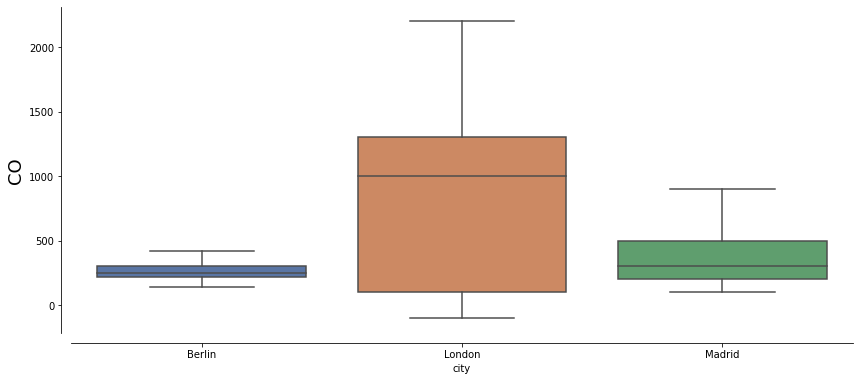

In [45]:
fig, ax = plt.subplots(1, figsize=(14,6))

ax = sns.boxplot(
    x='city',
    y='value',
    data=AirQualityCitiesCO,
    fliersize=0,
    palette='deep',
    ax=ax)


ax.set_ylabel("CO", fontsize=18)
ax.set_xlabel("city")

sns.despine(offset=10)


plt.show()

### 2.4. Second Analysis:How are cities doing in terms of PM25 pollution ??

In [46]:
AirQualityCitiesPM25=AirQualityCities[AirQualityCities['parameter']=='pm25']

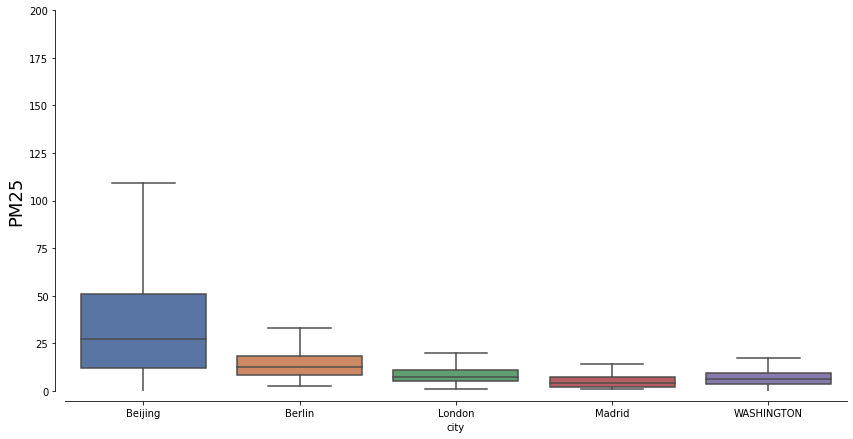

In [50]:
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='city',
    y='value',
    data=AirQualityCitiesPM25,
    fliersize=0,
    palette='deep',
    ax=ax)

ax.set_ylim([0, 200])
ax.set_ylabel("PM25", fontsize=18)
ax.set_xlabel("city")

sns.despine(offset=10)


plt.show()

### 2.5. Third Analysis:How are cities doing in terms of PM10 pollution ??

In [51]:
AirQualityCitiesPM10=AirQualityCities[AirQualityCities['parameter']=='pm10']

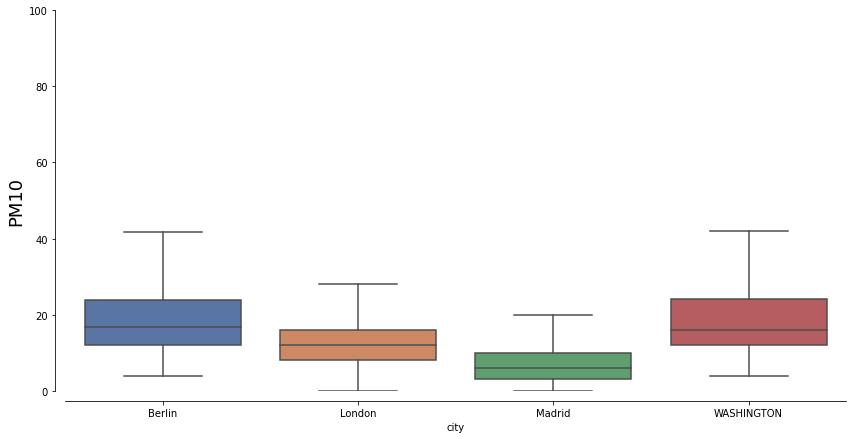

In [53]:
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='city',
    y='value',
    data=AirQualityCitiesPM10,
    fliersize=0,
    palette='deep',
    ax=ax)

ax.set_ylim([0, 100])
ax.set_ylabel("PM10", fontsize=18)
ax.set_xlabel("city")

sns.despine(offset=10)


plt.show()